In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [36]:
cities_by_day= pd.read_csv("/content/drive/MyDrive/FTS/Copy of cities_by_day.csv")
cities_by_day.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'C6H6', 'C7H8', 'C8H10', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [37]:
cities_by_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  C6H6        23908 non-null  float64
 12  C7H8        21490 non-null  float64
 13  C8H10       11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [38]:
cities_by_day.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


### find the percentage of missing values in each column.

In [39]:
"""
Find the ratio of missing values
--------------
"""
missing=pd.DataFrame(cities_by_day.isna().sum()/len(cities_by_day))
missing.columns=['ratio']
print(missing.sort_values(by='ratio', ascending=True))


               ratio
City        0.000000
Date        0.000000
CO          0.069723
NO          0.121296
NO2         0.121398
SO2         0.130507
O3          0.136196
NOx         0.141715
PM2.5       0.155701
AQI         0.158511
AQI_Bucket  0.158511
C6H6        0.190410
C7H8        0.272290
NH3         0.349734
PM10        0.377231
C8H10       0.613220


# Try to Plot this variation

In [40]:
missing_dataframe= pd.DataFrame(missing.to_dict()['ratio'].items())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

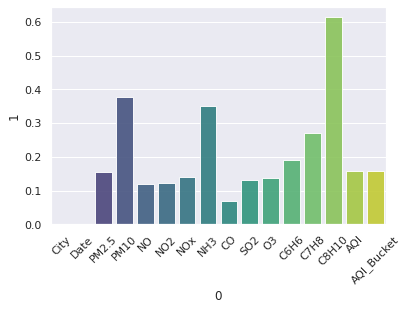

In [41]:


sns.set_theme()
plt.figure()
sns.barplot(data=missing_dataframe, y=1,x=0, palette="viridis", alpha=.9)
plt.xticks(rotation=45) 

### Xylene is the columns which is having very high (more than 60% ) null instances. We can try to exclude this column to decrease the computation cost  

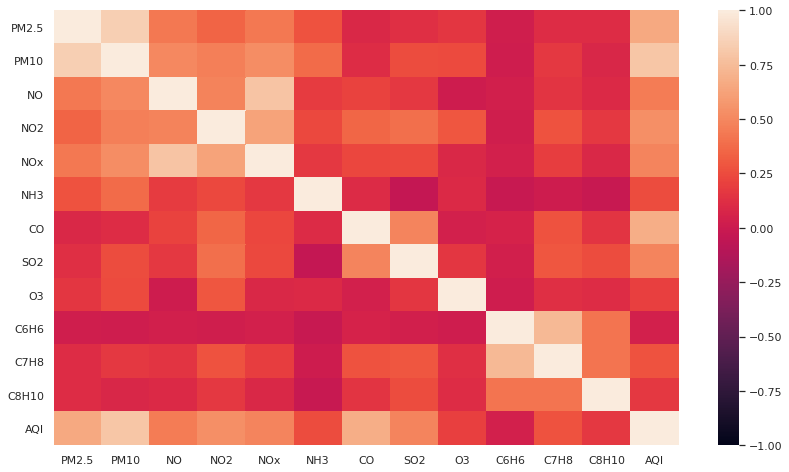

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI
PM2.5,1.000000,0.846498,0.433491,0.350709,0.436792,0.275086,0.089912,0.132325,0.161238,0.023911,0.117080,0.114579,0.659181
PM10,0.846498,1.000000,0.502349,0.464380,0.527768,0.376816,0.112588,0.256974,0.244919,0.022265,0.169335,0.081700,0.803313
NO,0.433491,0.502349,1.000000,0.478070,0.794890,0.185621,0.212607,0.170322,0.014580,0.035771,0.150857,0.094237,0.452191
NO2,0.350709,0.464380,0.478070,1.000000,0.627627,0.234938,0.356521,0.392233,0.293349,0.025260,0.273926,0.171701,0.537071
NOx,0.436792,0.527768,0.794890,0.627627,1.000000,0.166224,0.226992,0.238397,0.093170,0.039121,0.189386,0.087398,0.486450
NH3,0.275086,0.376816,0.185621,0.234938,0.166224,1.000000,0.104891,-0.038998,0.094972,-0.015650,0.013227,-0.019813,0.252019
CO,0.089912,0.112588,0.212607,0.356521,0.226992,0.104891,1.000000,0.489697,0.041736,0.061861,0.277904,0.154889,0.683346
SO2,0.132325,0.256974,0.170322,0.392233,0.238397,-0.038998,0.489697,1.000000,0.162142,0.036110,0.296139,0.251195,0.490586
O3,0.161238,0.244919,0.014580,0.293349,0.093170,0.094972,0.041736,0.162142,1.000000,0.020255,0.130209,0.111410,0.198991
C6H6,0.023911,0.022265,0.035771,0.025260,0.039121,-0.015650,0.061861,0.036110,0.020255,1.000000,0.739286,0.415427,0.044407


In [42]:
#plotting the correlation matrix with sns heatmap
corr_matrix = cities_by_day.iloc[:,2:].corr()
fig = plt.figure(figsize = (14,8 ))
sns.heatmap(corr_matrix, vmin=-1, vmax=1)
plt.show()
pd.DataFrame(corr_matrix)


### From above it looks that AQI is heighly correlated with PM10 and PM2.5 but very less correlated with compounds like benzen ,Xylene and ozone 

#### AQI and Cities 

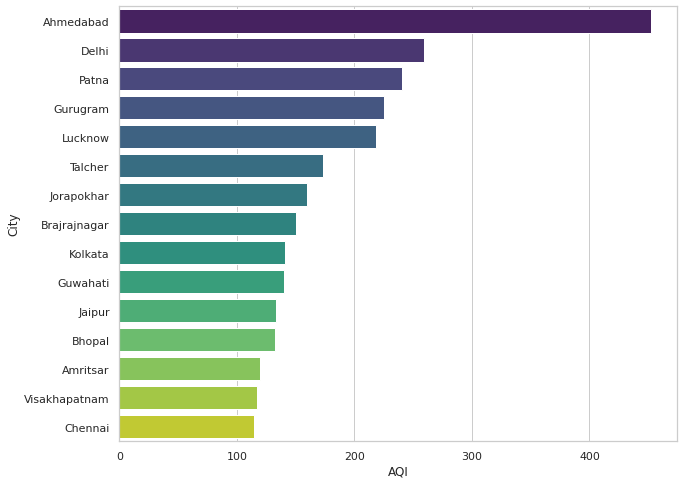

In [63]:
#Grouping the AQI by city and calculating the average AQI per city
cities_by_day_polluted=pd.DataFrame(cities_by_day.groupby(['City'])[['AQI']].mean().sort_values(by='AQI',ascending=False))
cities_by_day_polluted=cities_by_day_polluted.reset_index('City')

#plotting the average AQI per city
plt.figure(figsize = (10,8 ))
sns.barplot(data=cities_by_day_polluted.head(15),x='AQI',y='City',orient='h',palette='viridis')
plt.show()

In [44]:
cities_by_day.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'C6H6', 'C7H8', 'C8H10', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [45]:
#extracting year and month for each record


cities_by_day['year'] = pd.DatetimeIndex(cities_by_day['Date']).year
cities_by_day['month'] = pd.DatetimeIndex(cities_by_day['Date']).month

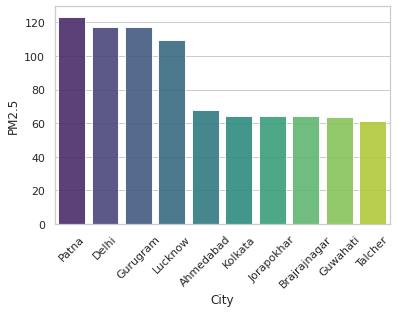

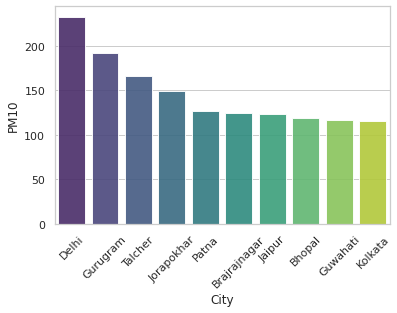

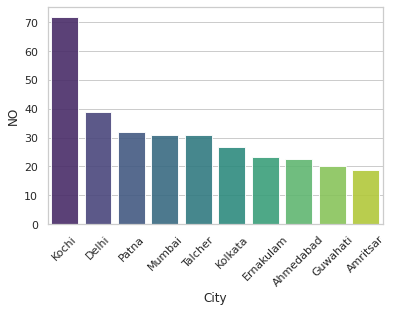

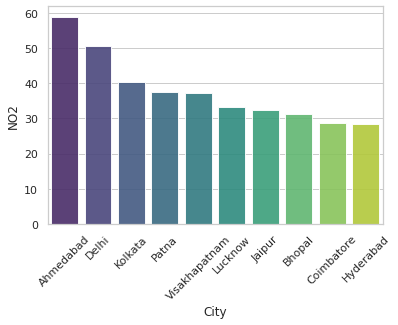

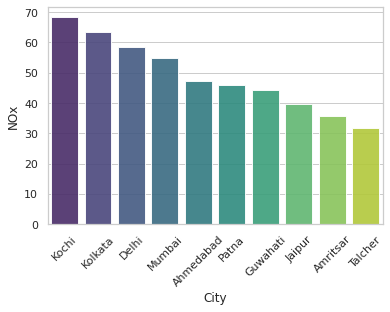

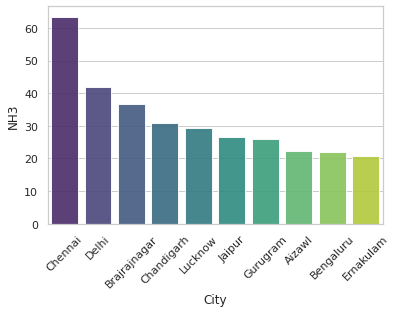

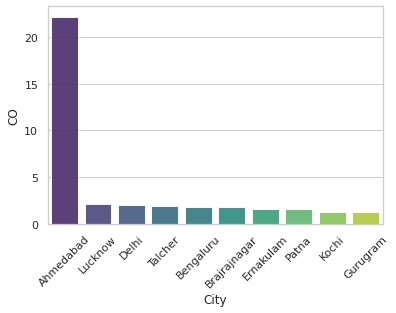

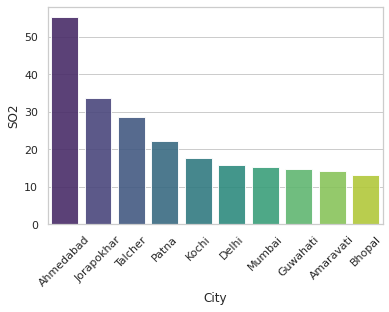

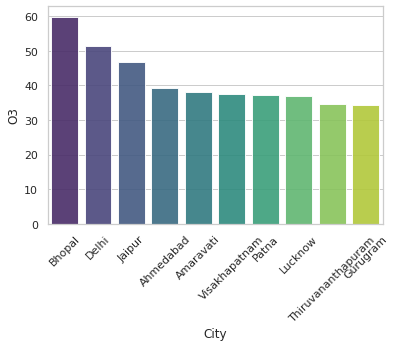

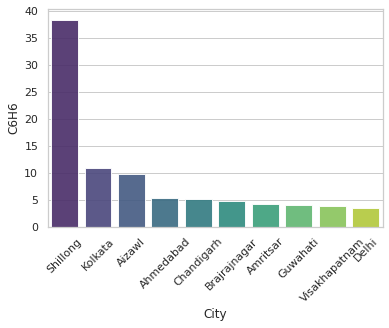

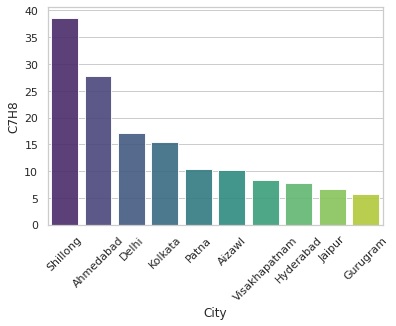

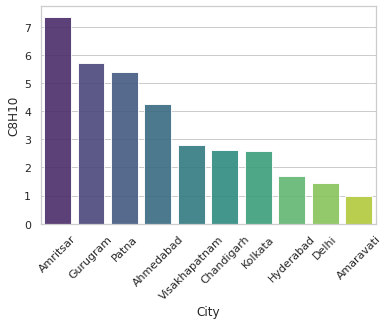

In [55]:

#list of pollutants
pollutants=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'C6H6', 'C7H8', 'C8H10']
sns.set_theme(style='whitegrid')



#plotting the top 10 most polluted cities for each category of pollutants, as well as overall AQI
for i in pollutants:
    df=cities_by_day.groupby(['City'])[[i]].mean().sort_values(i,ascending=False).iloc[:10,:]
    df=df.reset_index(['City'])
    plt.figure()
    sns.barplot(data=df, x="City", y=i, palette="viridis", alpha=.9)
    plt.xticks(rotation=45)



### AQI Trend Of Cities 

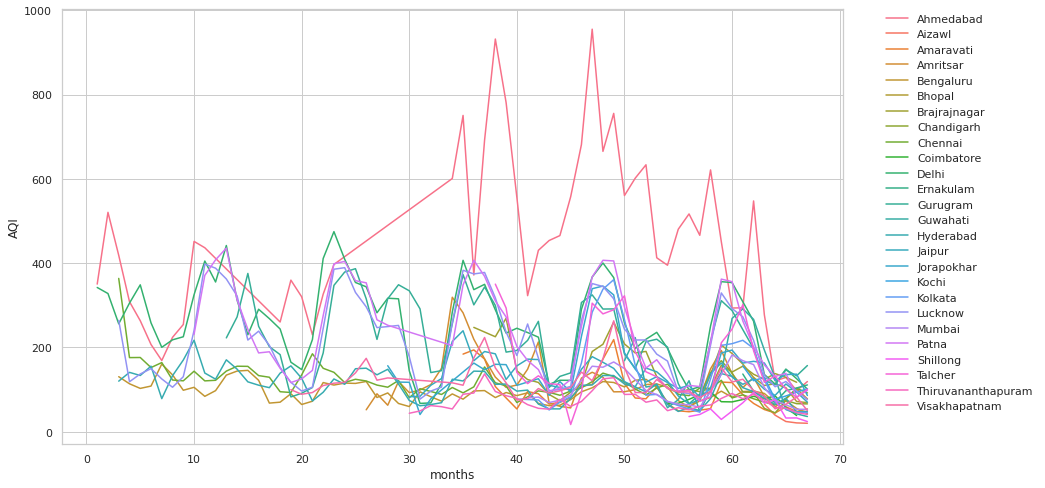

In [56]:
base=2015

cities_by_day['months']= (cities_by_day['year']-base)*12+ cities_by_day['month']
df_AQI_trend= cities_by_day.groupby(['City','months'])[['AQI']].mean().reset_index()

fig = plt.figure(figsize = (14,8 ))
sns.lineplot(
    data=df_AQI_trend,
    x="months", y="AQI",hue='City'
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Analysing the impact of COVID-19
Month = >48

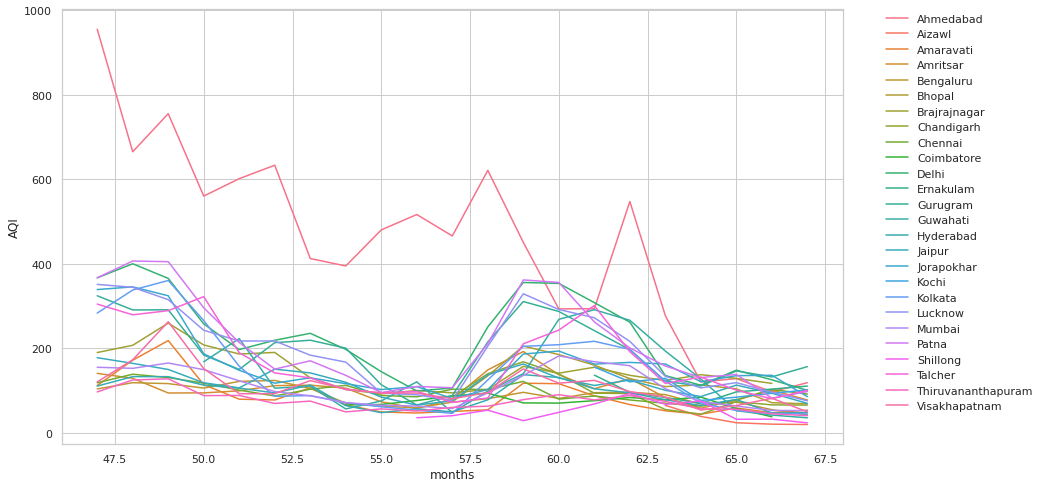

In [57]:
df_AQI_trend_covid=df_AQI_trend[df_AQI_trend['months']>46]

fig = plt.figure(figsize = (14,8 ))
sns.lineplot(
    data=df_AQI_trend_covid,
    x="months", y="AQI",hue='City'
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Plot The trend of Pollutents with respect to year to get an intution for the imputation

In [70]:
cities_by_day_polluted.sort_values(by="AQI")['City'].to_list()

['Aizawl',
 'Shillong',
 'Coimbatore',
 'Thiruvananthapuram',
 'Ernakulam',
 'Bengaluru',
 'Amaravati',
 'Chandigarh',
 'Kochi',
 'Mumbai',
 'Hyderabad',
 'Chennai',
 'Visakhapatnam',
 'Amritsar',
 'Bhopal',
 'Jaipur',
 'Guwahati',
 'Kolkata',
 'Brajrajnagar',
 'Jorapokhar',
 'Talcher',
 'Lucknow',
 'Gurugram',
 'Patna',
 'Delhi',
 'Ahmedabad']

In [91]:
list=[ 'Hyderabad',
 'Chennai',
 'Visakhapatnam',
 'Amritsar',
 'Bhopal',
 'Jaipur',
 'Guwahati',
 'Kolkata',
 'Brajrajnagar',
 'Jorapokhar',
 'Talcher',
 'Lucknow',
 'Gurugram',
 'Patna',
 'Delhi',
 'Ahmedabad']
def isInlist(i):
   return i in list


False

In [92]:
df_AQI_trend=df_AQI_trend[df_AQI_trend['City'].apply(isInlist)]
for polute in pollutants:
  fig = plt.figure(figsize = (14,8 ))
  sns.lineplot(
      data=df_AQI_trend,
      x="months", y=polute,hue='City'
  )
  plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)


Output hidden; open in https://colab.research.google.com to view.

In [84]:
   """

this part is to club the similer looking compounds like 
compounds with benzene ring 
compounds with Nitrogen(nitroznes)


"""


#extracting year and month for each record
cities_by_day['year'] = pd.DatetimeIndex(cities_by_day['Date']).year
cities_by_day['month'] = pd.DatetimeIndex(cities_by_day['Date']).month

#clubbing all particulate matter
cities_by_day['PM']=cities_by_day['PM2.5'] + cities_by_day['PM10']

#clubbing nitrogen oxides
cities_by_day['Nitric']=cities_by_day['NO'] + cities_by_day['NO2']+ cities_by_day['NOx']

#clubbing Benzene, toluene and Xylene together
#
cities_by_day['BTX']=cities_by_day['C6H6'] + cities_by_day['C7H8']+ cities_by_day['C8H10']

#grouping pollutant levels in every city by year and month
cities_by_day_group_ym=cities_by_day.groupby(['City','year','month'])[['PM','Nitric','CO','NH3','O3','SO2','BTX','AQI']].mean()

cities_by_day_group_ym=cities_by_day_group_ym.reset_index(['City','year','month'])
cities_by_day_group_ym.head()

,City,year,month,PM,Nitric,CO,NH3,O3,SO2,BTX,AQI
0,Ahmedabad,2015,1,NaN,91.401333,23.097333,NaN,46.350645,43.602903,6.971613,350.333333
1,Ahmedabad,2015,2,NaN,104.144000,21.820000,NaN,48.650400,63.194000,39.600000,520.640000
2,Ahmedabad,2015,3,NaN,83.193667,14.038333,NaN,45.752667,58.874333,42.736000,418.571429
3,Ahmedabad,2015,4,NaN,54.992667,7.306333,NaN,31.376000,51.233333,14.496333,308.640000
4,Ahmedabad,2015,5,NaN,50.607419,8.529677,NaN,31.624194,35.977419,19.677419,263.466667


Visualizing the most polluted cities for each category of pollutants (2017-19)¶
We take years 2017-2019 as our reference years to understand the general trend of pollutants prevailing in some of the most polluted Indian cities:

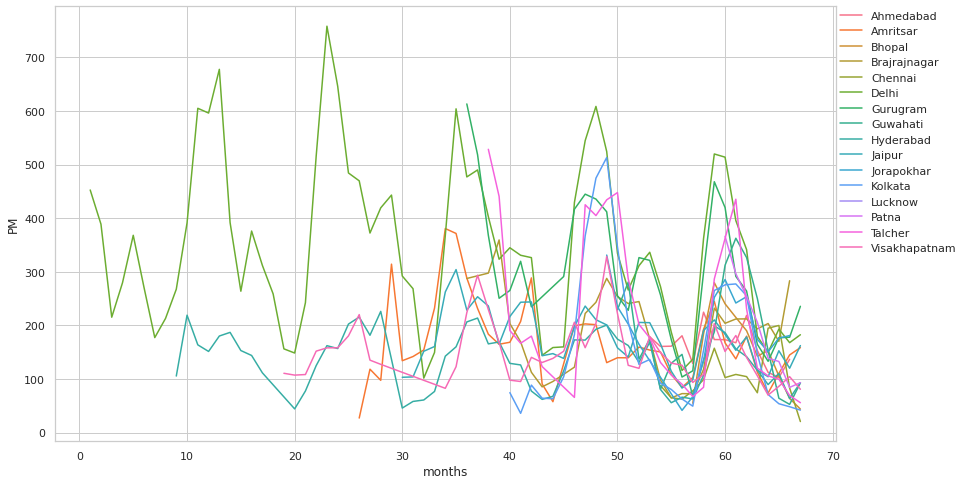

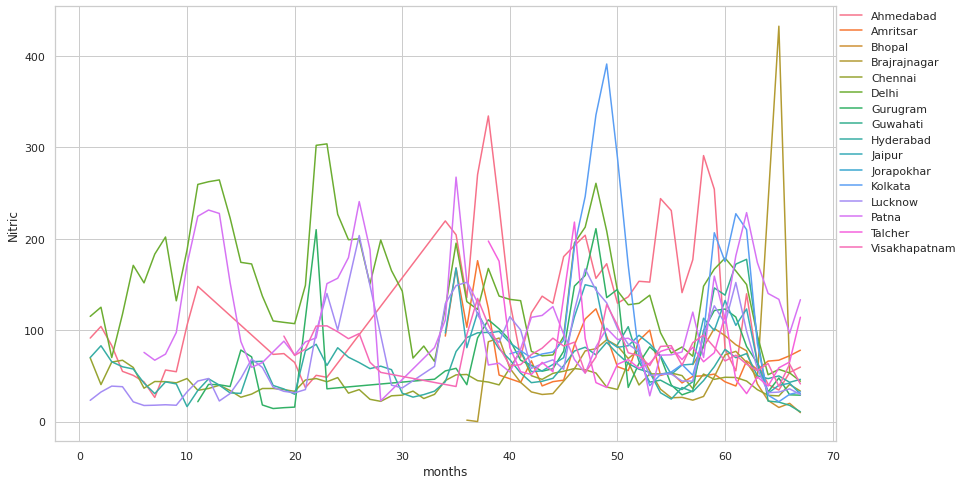

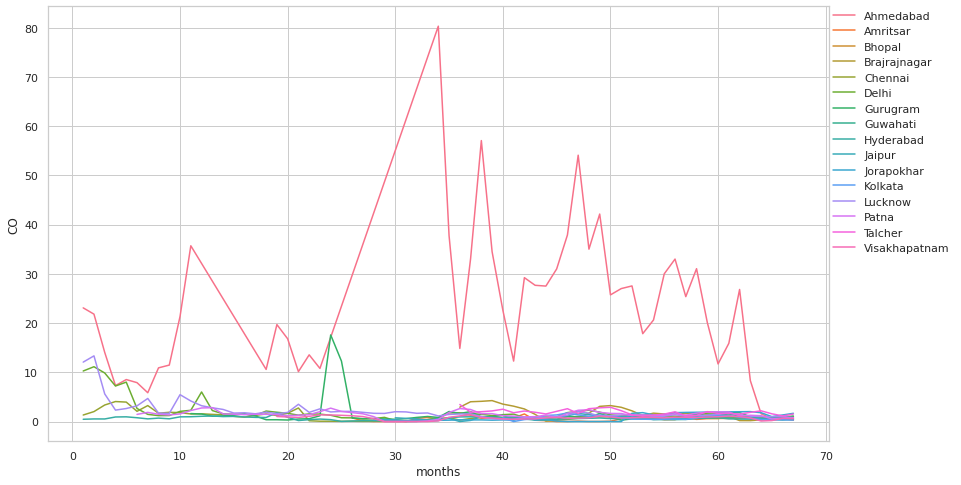

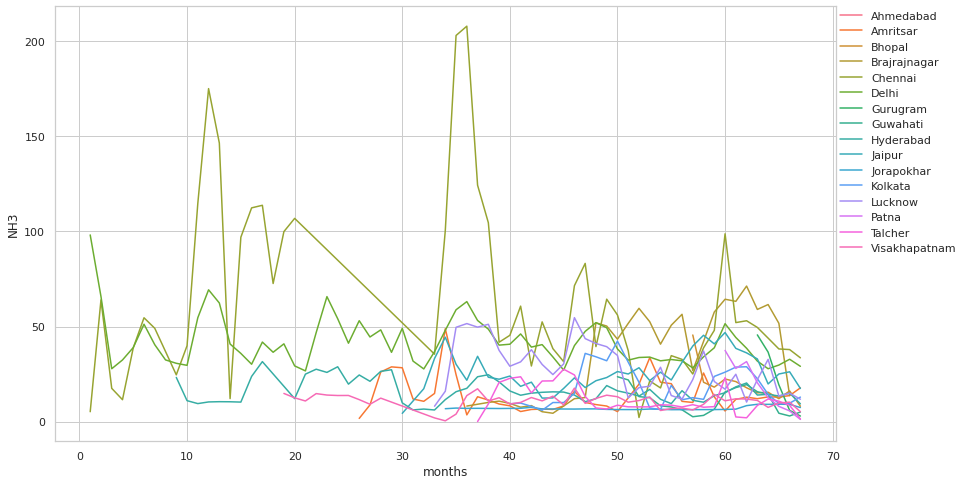

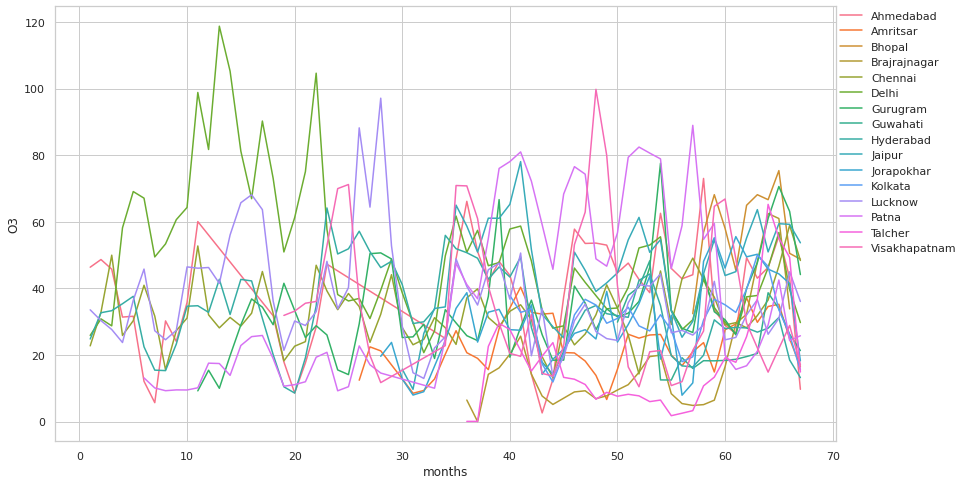

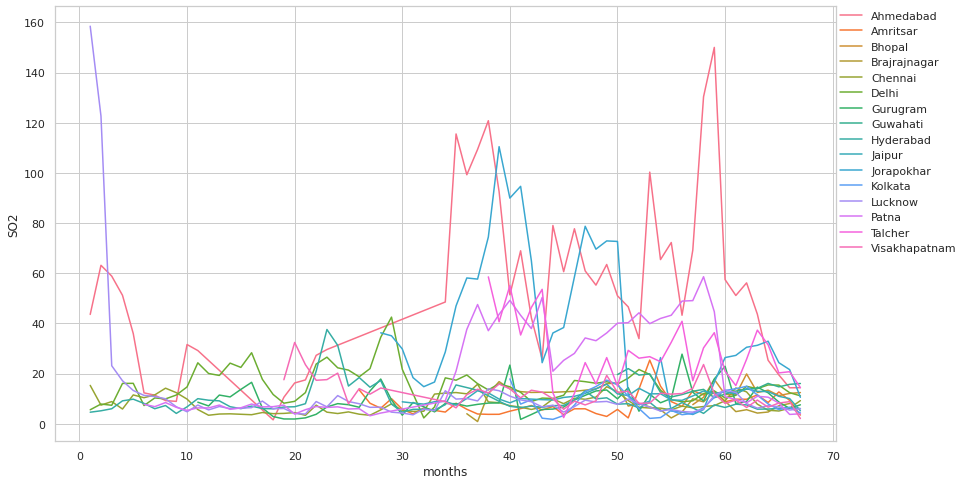

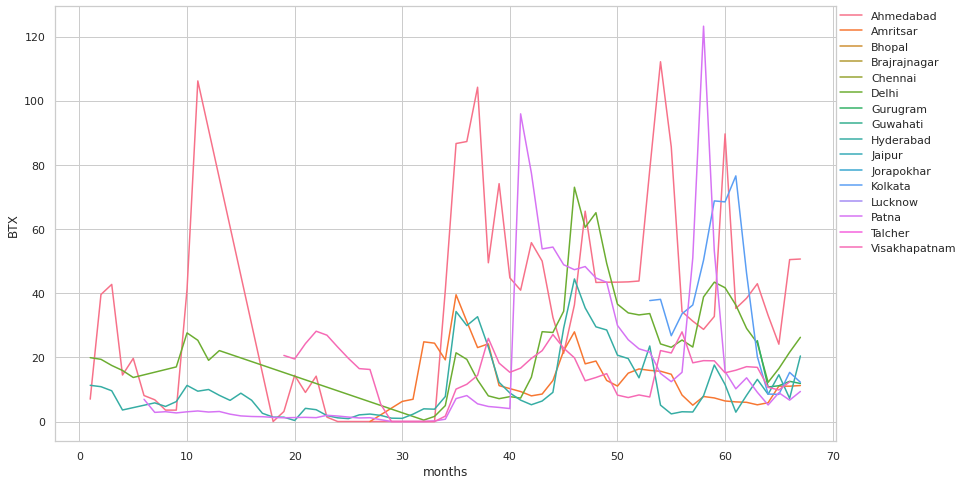

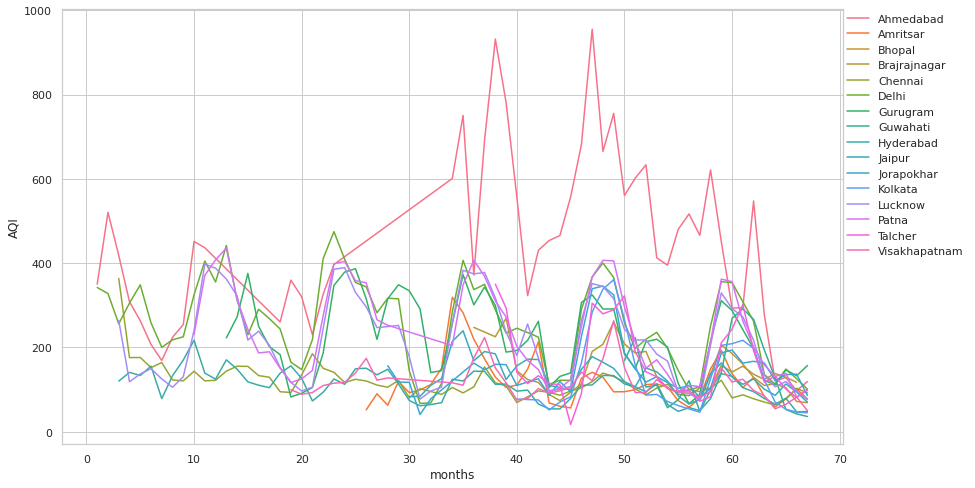

In [94]:

base=2015

cities_by_day_group_ym['months']= (cities_by_day_group_ym['year']-base)*12+ cities_by_day_group_ym['month']
df_AQI_trend= cities_by_day_group_ym.groupby(['City','months']).mean().reset_index()
df_AQI_trend=df_AQI_trend[df_AQI_trend['City'].apply(isInlist)]
for polute in ['PM','Nitric','CO','NH3','O3','SO2','BTX','AQI']:
  fig = plt.figure(figsize = (14,8 ))
  sns.lineplot(
      data=df_AQI_trend,
      x="months", y=polute,hue='City'
  )
  plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)